# Chapter_9 그래프와 시각화

## 9.1 matplotlib API 간략하게 살펴보기

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

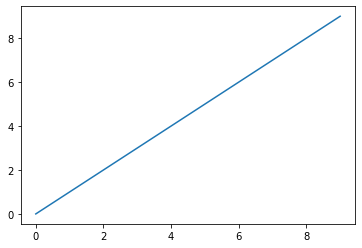

In [5]:
plt.plot(data)

### 9.1.1 figure 와 subplot

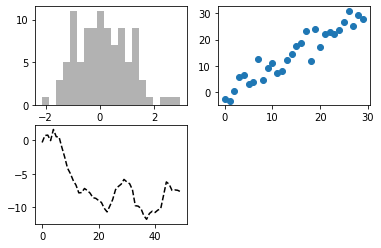

In [27]:
# matplotlib 에서 그래프는 figure 객체 내에 존재한다.
# 그래프를 위한 새로운 figure 는 plt.figure를 사용해서 생성할 수있다.

fig = plt.figure()

# figsize 는 figure 의 크기와 비율을 정할 수 있다.
# 빈 figure로는 그래프를 그릴 수 없으니 add_subplot 을 사용해서 최소 하나 이상의 subplots 를 생성해야 한다.

ax1 = fig.add_subplot(2, 2, 1) # figure가 2*2 크기이고 4개의 서브플롯 중에 첫 번째를 선택하겠다는 의미다.

# 다음처럼 2개의 서브플롯을 더 추가하면 이렇게 된다.

ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

# 그래프를 그려보자.
plt.plot(np.random.randn(50).cumsum(), 'k--') #'k--' 옵션은 검은 점선을 그리기 위한 스타일 옵션이다.

# fig.add_subplot 에서 반환되는 객체는 AxesSubplot 인데, 각각의 인스턴스 메서드를 호출해서 다른 빈 서브플롯에 직접 그릴 수 있다.
a = ax1.hist(np.random.randn(100),bins=20, color='k',alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025247BCAEF0>,
      dtype=object)

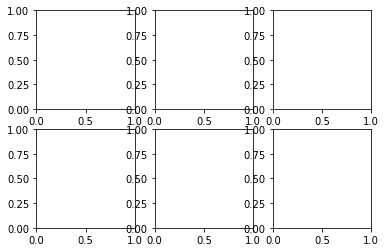

In [28]:
# 특정한 배치에 맞추어 여러 개의 서브플롯을 포함하는 figure를 생성하는 일은 흔히 접하는데
# 이를 위한 plt.subplots 라는 편리한 메서드가 있다.
# 이 메서드는 Numpy 배열과 서브플롯 객체를 새로 생성하여 반환한다.

fig, axes = plt.subplots(2, 3)
axes

# axes 배열은 axes[0, 1] 처럼 2차원 배열로 쉽게 색인될 수 있어서 편리하게 사용할 수 있다.
# 서브플롯이 같은 x축 혹은 y축을 가져야 한다면 각각 sharex와 sharey 를 사용해서 지정할 수 있다.

#### pyplot.subplots 옵션

- nrows 서브플롯의 로우 수
- ncols 서브플롯의 컬럼 수
- sharex 모든 서브플롯이 같은 x축 눈금을 사용하도록 한다.(xlim 값을 조절하면 모든 서브플롯에 적용된다.
- sharey 위와 같음
- subplot_kw : add_subplot을 사용해서 각 서브플롯을 생성할 때 사용할 키워드를 담고 있는 사전
- **fig_kw : figure를 생성할 때 사용할 추가적인 키워드 인자. 예를 들면 plt.subplots(2, 2, figsize=(8,6)

#### subplots 간의 간격 조절하기

In [30]:
# subplots_adjust 메서드
# subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)

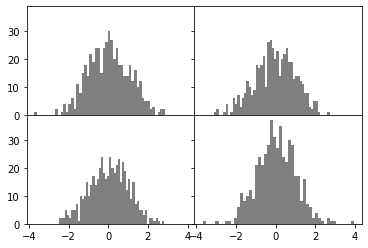

In [31]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
        
plt.subplots_adjust(wspace=0, hspace=0)

### 9.1.2 색상, 마커, 선 스타일

In [34]:
from numpy.random import randn

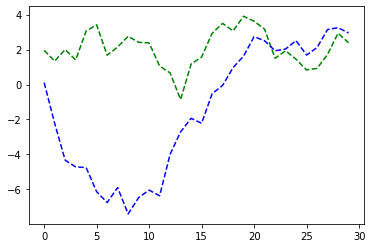

In [40]:
plt.plot(randn(30).cumsum(), 'g--')
plt.plot(randn(30).cumsum(), linestyle='--', color='b')

# 위와 아래가 동일한 결과를 나타낸다. 어떻게 표현하느냐의 차이다.

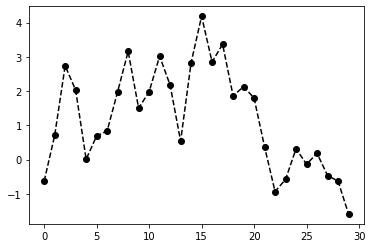

In [35]:
# 마커를 추가하는 거도 가능하다.
# marker = '0'
plt.plot(randn(30).cumsum(), 'ko--')

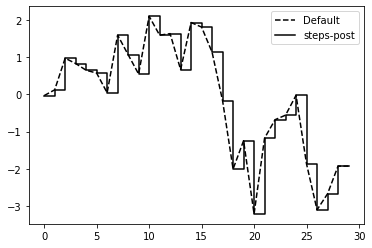

In [51]:
# 선그래프를 보면 일정한 간격으로 연속된 지점이 연결되어 있다.
# 이 역시 drawstyle 옵션을 이용해서 바꿀 수 있다.

data = np.random.randn(30).cumsum()

plt.plot(data, 'k--',label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best') # 범례를 추가할 때 반드시 호출해주는 옵션

### 9.1.3 눈금, 라벨, 범례

그래프를 꾸미는 방법은 2가지가 있다.

- pyplot 인터페이스를 사용해서 순차적으로 꾸미기(즉, matplotlib.pyplot)
- 아니면 matplotlib이 제공하는 API를 사용해서 좀 더 객체지향적인 방법으로 꾸미는 것

#### 제목, 축 이름, 눈금, 눈금 이름 설정하기

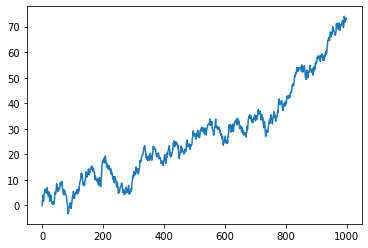

In [55]:
# 아무 그래프나 그려보자.

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

In [63]:
# x축의 눈금을 변경하기 위한 가장 쉬운 방법은 set_xticks 와 set_xticklabels 메서드를 사용하는 것이다.
# set_xticks 메서드는 전체 데이터 범위를 따라 눈금을 어디에 배치할지 지정하는 것.
# 기본적으로 이 위치에 눈금 이름이 들어가며, 다른 눈금 이름을 지정하고 싶으면 set_xticklabels 를 쓴다.

ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                           rotation=30, fontsize='small')

# 마지막으로 set_xlabel 메서드는 x축에 대한 이름을 지정하고
# set_title 메서드는 서브플롯의 제목을 지정한다.

ax.set_title("My first matplotlib plot")
ax.set_xlabel("Stages")

#### 범례 추가하기

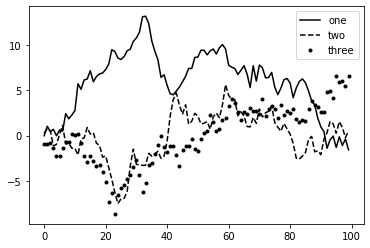

In [68]:
# 가장 쉬운 방법은 각 그래프에 label 인자를 넘기는 것

fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)

ax.plot(randn(100).cumsum(), 'k', label='one')
ax.plot(randn(100).cumsum(), 'k--', label='two')
ax.plot(randn(100).cumsum(), 'k.', label='three')
ax.legend(loc='best') # loc 는 범례 위치를 location 시키는 인자다. best 로 족할 것이다.
# 범례에서 제외하고 싶은 요소가 있다면 label 인자를 넘기지 않거나 label='_nolegend_' 옵션을 사용하면 된다.

### 9.1.4 주석과 그림 추가하기

In [70]:
# 주석과 글자는 text, arrow, annotate 함수를 이용해서 추가할 수 있다.
# text 함수는 그래프 내의 주어진 좌표 (x, y) 에 부가적인 스타일로 글자를 그려준다.

#ax.text(x, y, 'Hello world!',family = 'monospace', fontsize=10)

In [71]:
# 주석은 글자와 화살표를 함께 써서 그릴 수 있다.
from datetime import datetime

FileNotFoundError: [Errno 2] File b'examples/spx.csv' does not exist: b'examples/spx.csv'

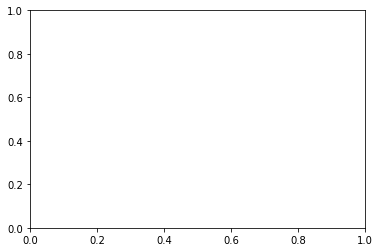

In [73]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
data = pd.read_csv('examples/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data=[
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75), # ax.annotate 메서드로 x,y 좌표로 지정한 위치에 라벨을 추가.
               xytext=(date, spx.asof(date) + 225),
               arrowprops=dict(facecolor='black', headwidth=4, width=2, headlength=4),
               horizontalalignment='left', verticalalignment='top')
    
# 2007- 2010 구간으로 확대
ax.set_xlim(['1/1/2007', '1/1/2011']) # 그래프의 시작과 끝 경계를 직접 지정
ax.set_ylim([600, 1800]) # 마찬가지.

ax.set_title('Important dates in the 2008-2009 financial crisis') # 그래프 제목 지정

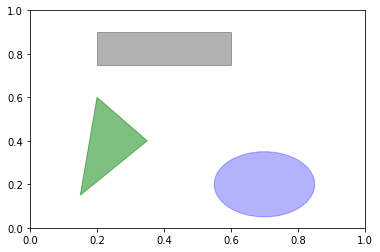

In [75]:
# matplotlib은 일반적인 도형을 표현하기 위한 patches라는 객체를 제공한다.
# 그 중 Rectangle 과 Circle 같은 것은 matplotlib.pyplot 에서도 찾을 수 있지만 전체 모음은 matplotlib.patches 에 있다.
# 그래프에 도형을 추가하려면 patches 객체인 shp를 만들고 서브플롯에 ax.add_patch(shp) 를 호출한다.

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]], color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

### 9.1.5 그래프를 파일로 저장하기

In [76]:
# 활성화된 figure는 plt.savefig 메서드를 이용해서 파일로 저장할 수 있다.
# 이 메서드는 figure 객체의 인스턴스 메서드인 savefig와 동일하다.
# figure 를 SVG 포맷으로 저장하려면 다음처럼 하면 된다.

# plt.savefig('figpath.svg')

In [77]:
# 파일 종류는 확장자로 결정된다. 그러므로 .svg 대신에 .pdf. 로 입력하면 PDF 파일을 얻게 된다.
# 출판용 그래픽 파일을 생성할 때 자주 사용하는 몇 가지 중요한 옵션이 있는데 dpi와 bbox_inches 다.
# dpi는 인치당 도트 해상도이며, bbox_inched는 실제 figure 둘레의 공백을 잘라낸다.

# plt.savefig('figpath.png', dpi=400, bbox_inches='tight')

In [78]:
# savefig 메서드는 파일에 저장할 뿐만 아니라 BytesIO 처럼 파일과 유사한 객체에 저장하는 것도 가능하다.

from io import BytesIO
buffer = BytesIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()

<Figure size 432x288 with 0 Axes>

#### Figure.savefig 옵션

- fname = 파일 경로를 나타내는 문자열
- dpi = figure의 인치당 도트 해상도 기본값은 100
- facecolor, edgecolor = 서브플롯 바깥 배경 색상. 기본값은 'w' 다.
- format = 명시적인 파일 포맷('png', 'pdf', 'svg', 'ps', 'eps', ...)
- bbox_inches = figure 에서 저장할 부분. 만약 'tight'를 지정하면 둘레를 모두 제거한다.

### 9.1.6 matplotlib 설정

matplotlib은 출판물용 그래프를 만드는 데 손색이 없다! 게다가 거의 모든 기본 동작은 많은 전역 인자를 통해 설정 가능하다

In [79]:
# rc 메서드로 설정해보자.

plt.rc('figure', figsize=(10, 10))

In [80]:
# rc 메서드의 첫 번째 인자는 설정하고자 하는 'figure', 'axes', 'xtick', 'ytick', 'grid', 'legend' 및 다른 컴포넌트의 이름이다.
# 이 옵션을 쉽게 작성하려면 파이썬의 사전 타입을 사용한다.

font_options = {'family': 'monospace',
               'weight':'bold',
               'size':'small'}
plt.rc('font', **font_options)

ValueError: Key font.size: Could not convert "small" to float

## 9.2 pandas 에서 seaborn으로 그래프 그리기

### 9.2.1 선그래프

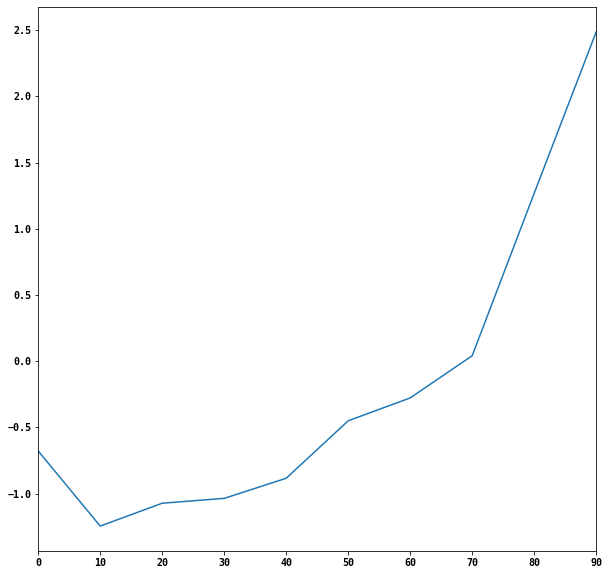

In [83]:
# Series 와 DataFrame 은 둘 다 plot 메ㅓ드를 이용해 다양한 형태의 그래프를 생성할 수 있다.

s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

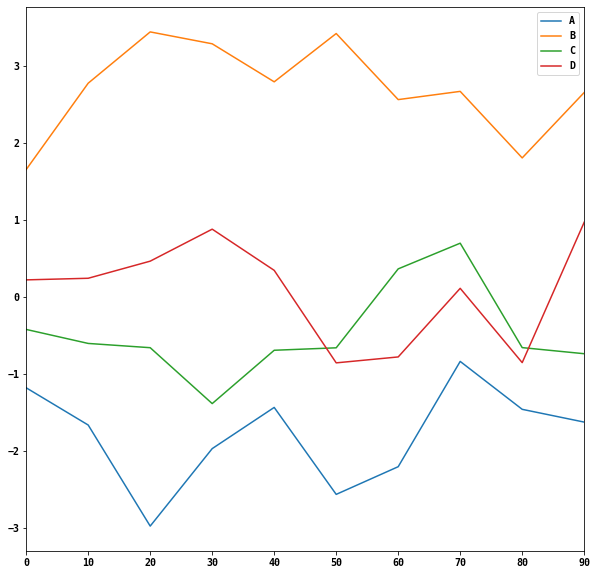

In [84]:
# Series 객체의 색인은 matplotlib 에서 그래프를 생성할 때 x축으로 해석되며
# use_index=False 옵션을 넘겨서 색인을 그래프의 축으로 사용하는 것을 막을 수 있다.
# x축의 눈금과 한계는 xticks와 xlim 옵션으로 조절할 수 있으며 y축 역시 마찬가지다.

# DataFrame 의 plot 메서드는 하나의 서브플롯 안에 각 컬럼별로 선그래프를 그리고 자동적으로 범례를 생성한다.

df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                 columns=['A', 'B', 'C', 'D'],
                 index= np.arange(0, 100, 10))

df.plot()


In [85]:
# plot 속성에는 다양한 종류의 그래프 패밀리가 존재한다.
# 예를 들어 df.plot() 은 df.plot.line() 과 동일하다.

#### Series.plot 메서드 인자

- label = 그래프의 범례 이름
- ax = 그래프를 그릴 matplotlib의 서브플롯 객체. 만약 아무것도 넘어오지 않으면 현재 활성화되어 있는 matplotlib의 서브플롯을 사용한다.
- style = matplotlib에 전달할 'ko--' 같은 스타일 문자열
- alpha = 그래프 투명도(0부터 1까지)
- kind = 그래프 종류. 'area', 'bar', 'barh', 'density', 'hist', 'kde', 'line', 'pie'
- logy = y축에 대한 로그 스케일링
- use_index = 객체의 색인을 눈금 이름으로 사용할지 여부
- rot = 눈금 이름을 로테이션(0부터 360까지)
- xticks = x축으로 사용할 값
- yticks
- xlim = x축의 한계([0, 10])
- grid = 축의 그리드를 표시할지 여부(기본값은 켜기)

#### DataFrame의 plot 메서드 인자

- subplots : 각 DataFrame 의 컬럼을 독립된 서브플롯에 그린다.
- sharex : subplots=True 인 경우 같은 x축을 공유하고 눈금과 한계를 연결한다.
- sharey : 상동
- figsize : 생성될 그래프의 크기를 튜플로 지정한다.
- title : 그래프의 제목을 문자열로 지정한다.
- legend : 서브플롯의 범례를 추가한다.(기본값은 True)
- sort_columns : 컬럼을 알파벳 순서로 그린다. 기본값은 존재하는 컬럼 순서.

### 9.2.2 막대그래프

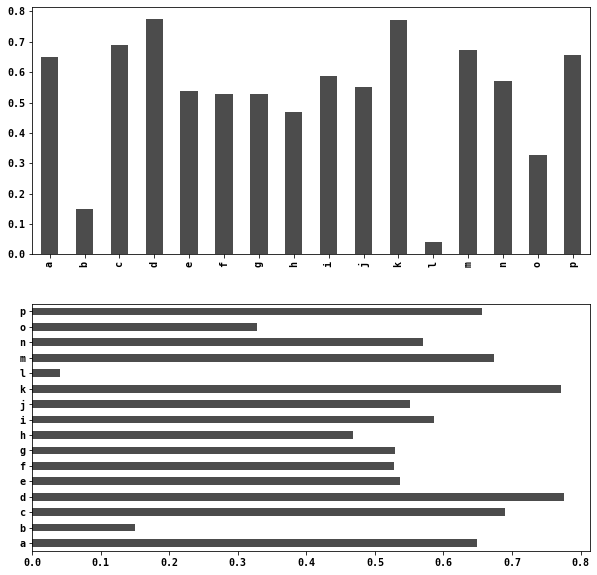

In [86]:
# plot.bar() 와 plot.barh() 는 각각 수직막대그래프와 수평막대그래프를 그린다.
# 이 경우 Series 또는 DataFrame의 색인은 수직막대그래프(bar)인 경우 x눈금,
# 수평막대그래프(barh) 인 경우 y눈금으로 사용된다.

fig, axes = plt.subplots(2, 1) # 2*1 의 figure 를 만들었고,

data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop')) # 시리즈 만들었고

data.plot.bar(ax=axes[0], color='k', alpha=0.7) # axes는 figure 선정,color 는 색상, alpha 는 투명도.

data.plot.barh(ax=axes[1], color='k', alpha=0.7)

In [87]:
# DataFrame에서 막대그래프는 각 로우의 값을 함께 묶어서 하나의 그룹마다 각각의 막대를 보여준다.

df = pd.DataFrame(np.random.rand(6, 4),
                 index = ['one', 'two', 'three', 'four', 'five', 'six'],
                 columns = pd.Index(['A', 'B', 'C', 'D'], name='Genus'))

df

Genus,A,B,C,D
one,0.802531,0.107744,0.164822,0.826568
two,0.344114,0.904926,0.102315,0.966844
three,0.923600,0.351236,0.322977,0.159603
four,0.052725,0.418290,0.084423,0.348112
five,0.906875,0.123518,0.132041,0.216344
six,0.563991,0.150203,0.569575,0.561236


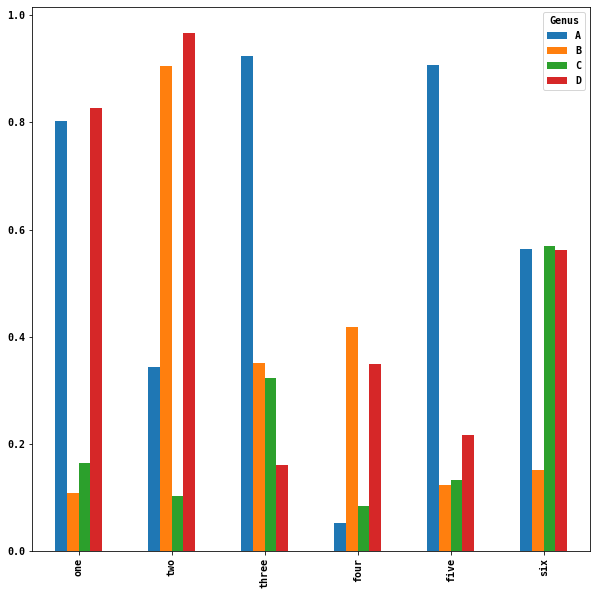

In [88]:
df.plot.bar()

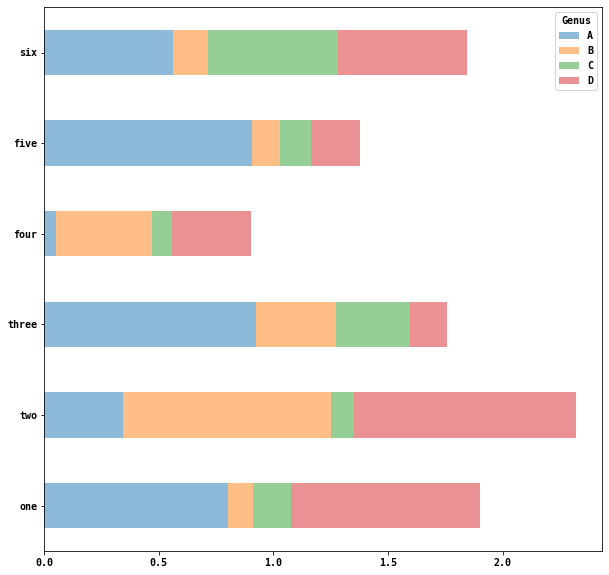

In [89]:
# 누적막대그래프는 stacked=True 옵션을 사용해서 생성할 수 있다.

df.plot.barh(stacked=True, alpha=0.5)

In [90]:
import seaborn as sns

In [93]:
df.head(2)

Genus,A,B,C,D
one,0.802531,0.107744,0.164822,0.826568
two,0.344114,0.904926,0.102315,0.966844


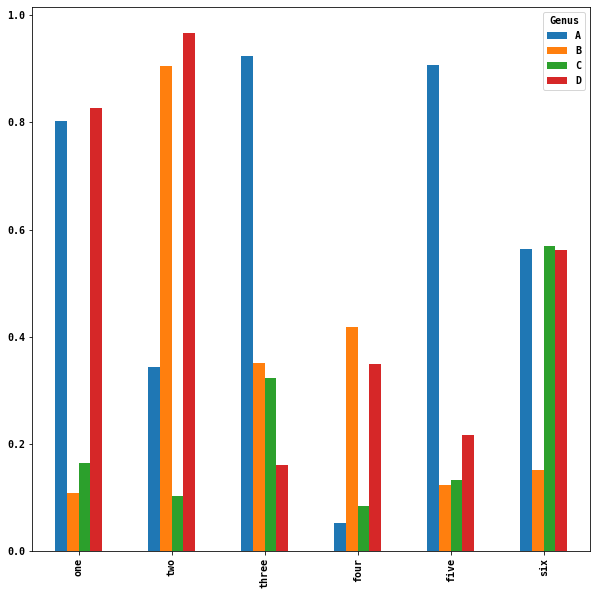

In [92]:
df.plot.bar()